In [2]:
import sklearn
import numpy
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv("iris.csv")
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [5]:
cdf=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
cdf.head(10)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
5            5.4           3.9            1.7           0.4
6            4.6           3.4            1.4           0.3
7            5.0           3.4            1.5           0.2
8            4.4           2.9            1.4           0.2
9            4.9           3.1            1.5           0.1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

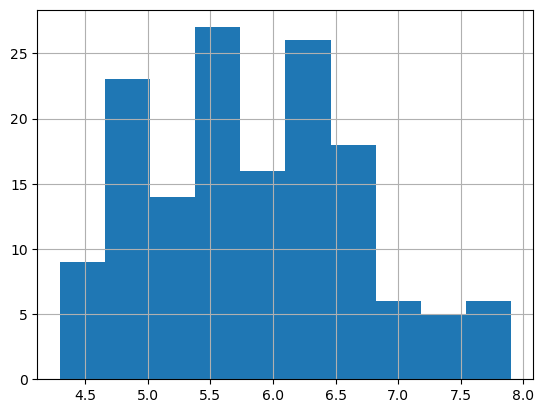

In [10]:
df['SepalLengthCm'].hist()

<Axes: >

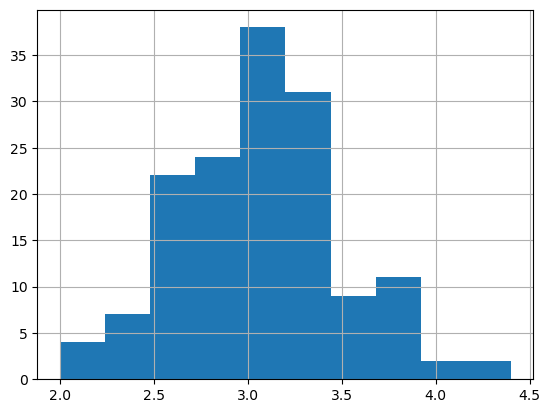

In [11]:
df['SepalWidthCm'].hist()

<Axes: >

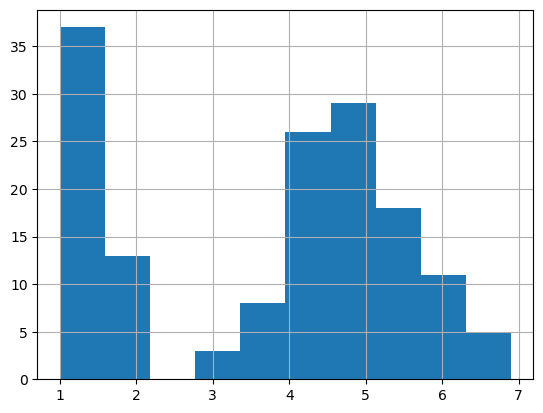

In [12]:
df['PetalLengthCm'].hist()

<Axes: >

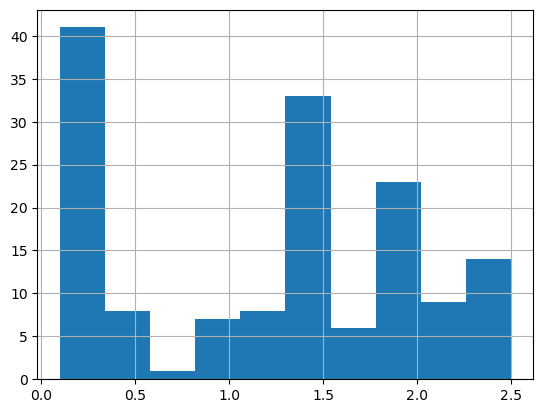

In [13]:
df['PetalWidthCm'].hist()

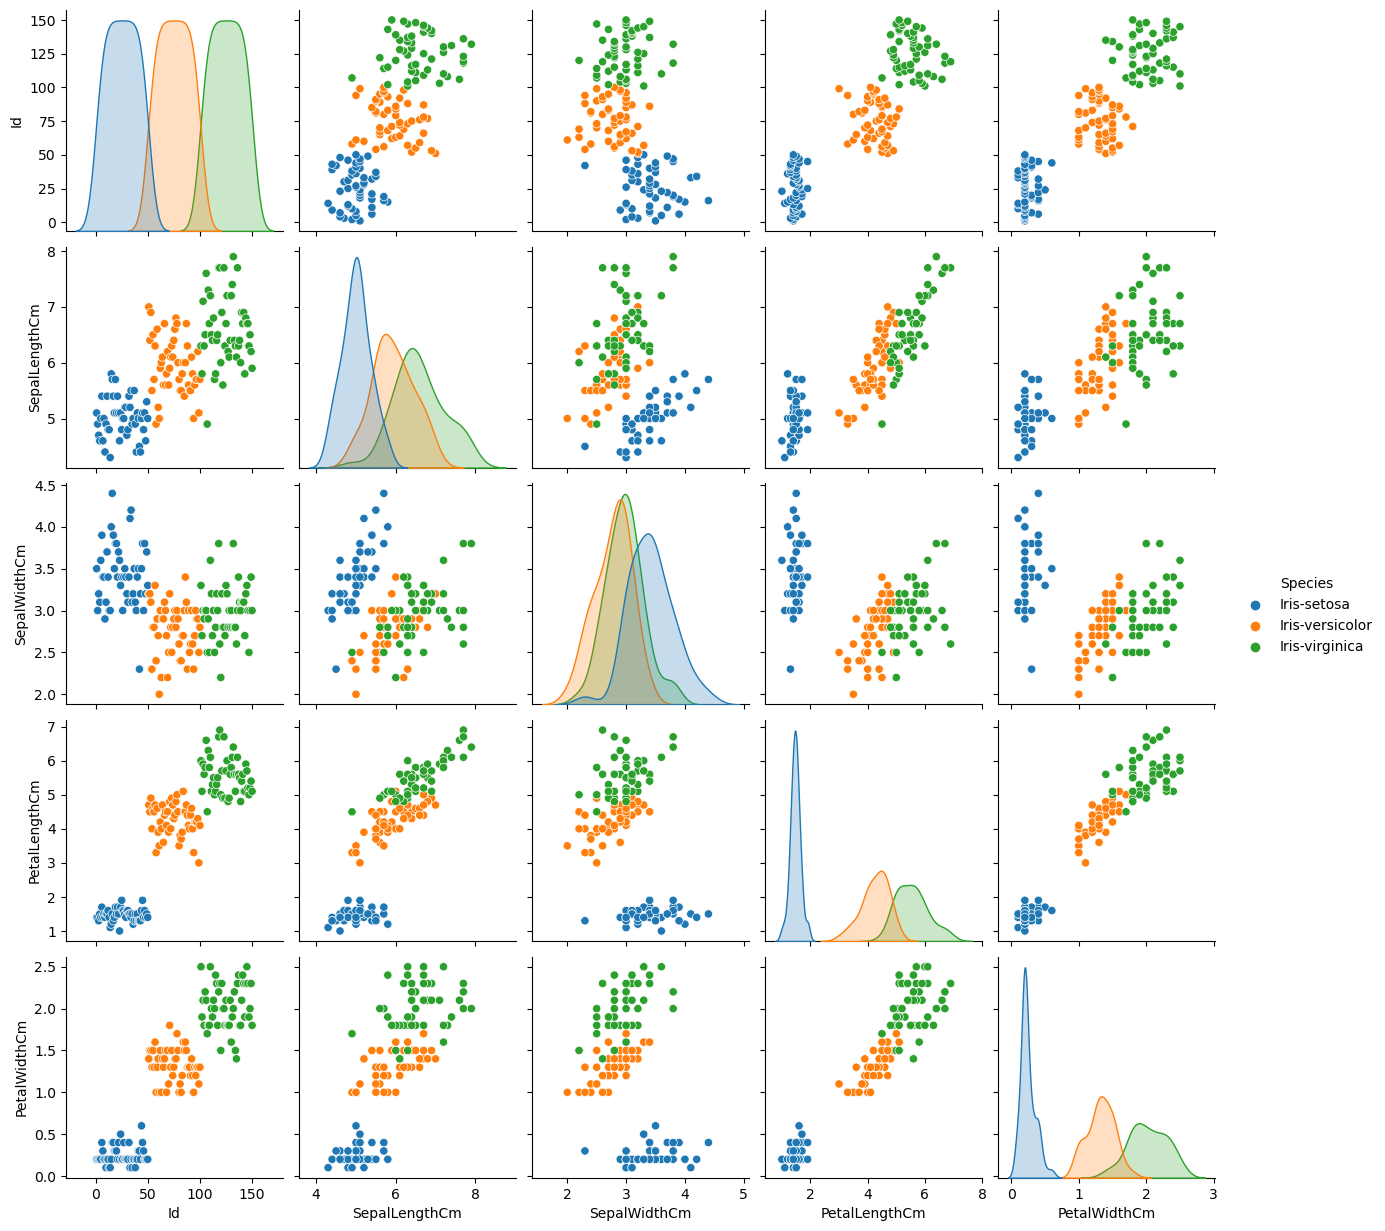

In [14]:
sns.pairplot(df,hue='Species')

In [15]:
colors=['red','purple','green']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

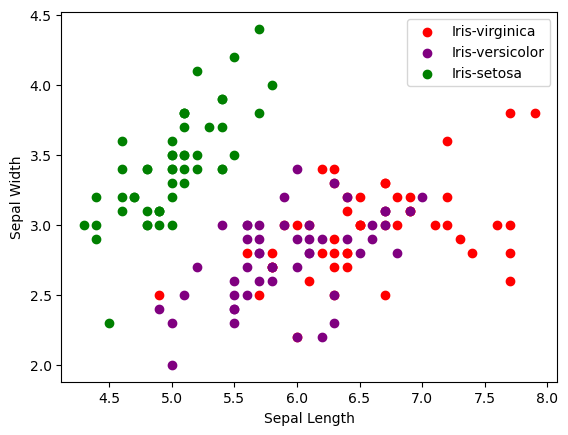

In [17]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

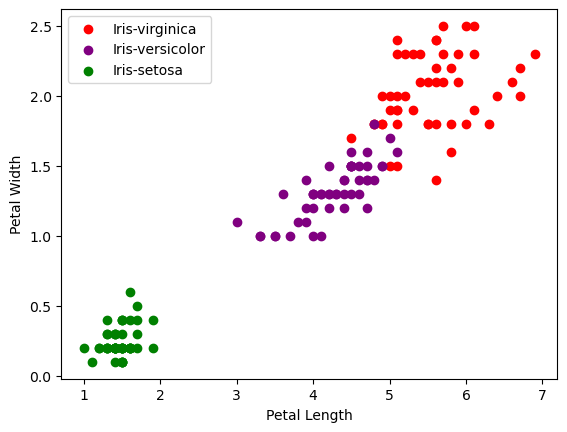

In [18]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

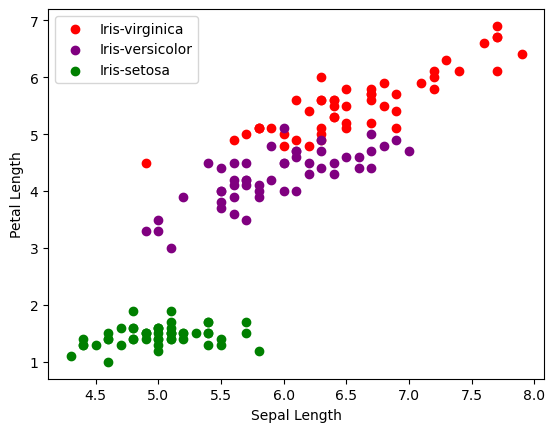

In [19]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

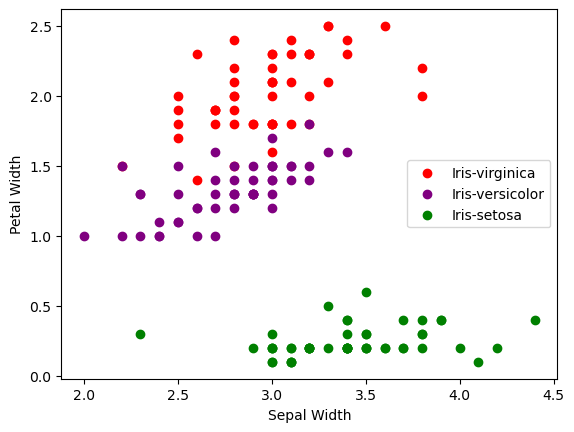

In [20]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [22]:
from sklearn.preprocessing import LabelEncoder
df.Species=LabelEncoder().fit_transform(df.Species)

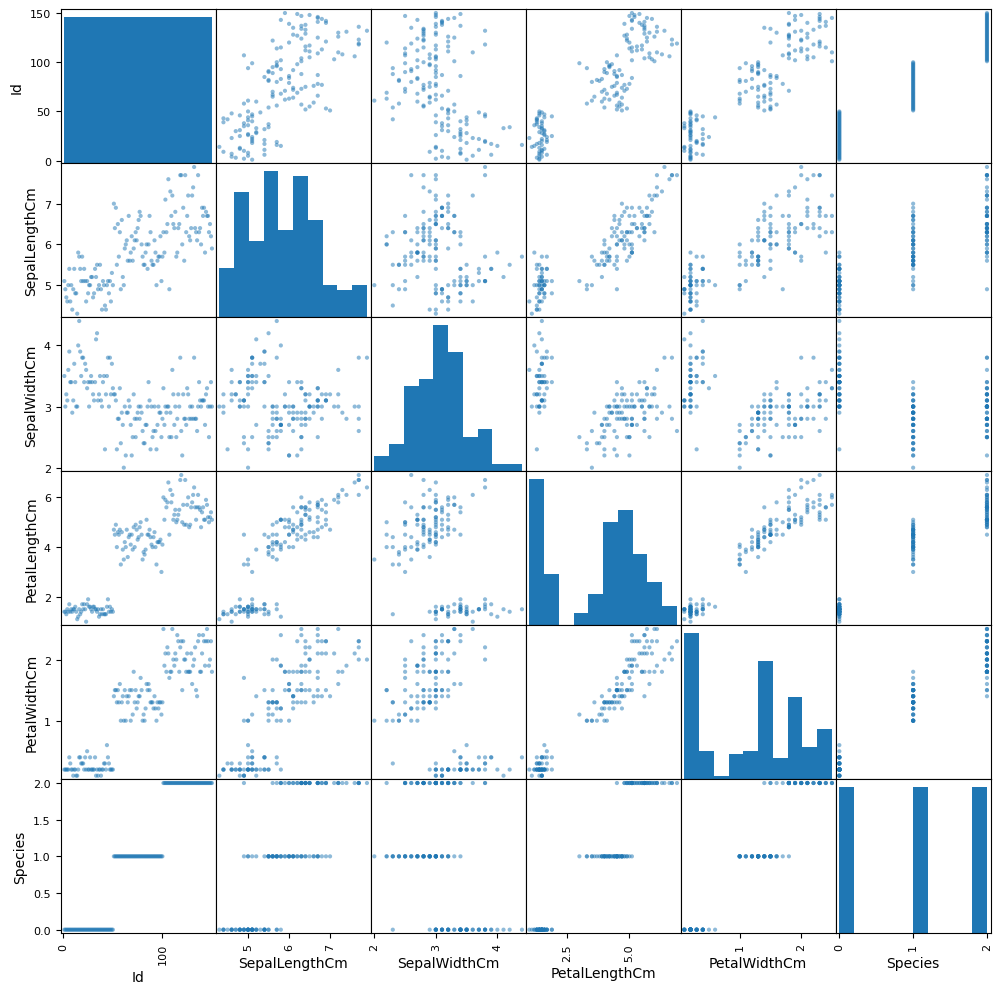

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(12,12))
plt.show()

<Axes: >

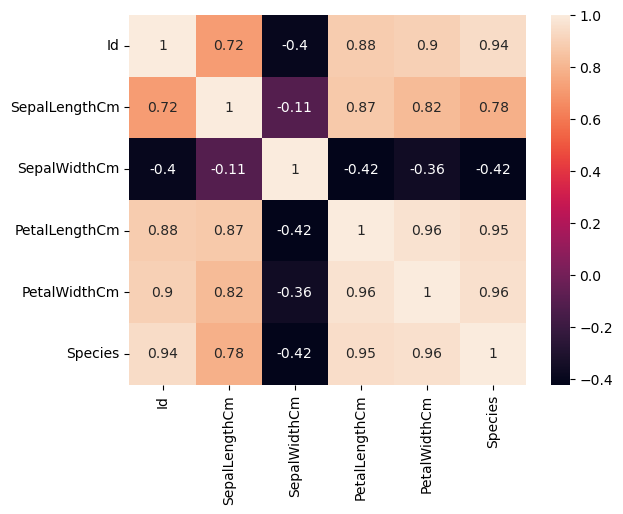

In [24]:
sns.heatmap(df.corr(),annot=True)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

x=df.drop(columns=['Species'])
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [29]:
model=LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy:",model.score(x_test,y_test)*100)

Logistic Regression Accuracy: 100.0


In [28]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [30]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [32]:
model=KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print("K-nearest neighbors Accuracy:",model.score(x_test,y_test)*100)

K-nearest neighbors Accuracy: 100.0


In [33]:
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [34]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [35]:
model=DecisionTreeClassifier()
model.fit(x_train.values,y_train.values)
print("Decision Tree Accuracy:",model.score(x_test,y_test)*100)

Decision Tree Accuracy: 100.0


In [36]:
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [37]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [38]:
import pickle

In [39]:
filename='saved_model.sav'
try:
    with open(filename,'wb') as file:
        pickle.dump(model,file)
    print("Model saved successfully")
except Exception as e:
    print("Error saving the model:{e}")

Model saved successfully


In [40]:
load_model=pickle=pickle.load(open(filename,'rb'))

In [48]:
x_test.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
23  24            5.1           3.3            1.7           0.5
24  25            4.8           3.4            1.9           0.2
60  61            5.0           2.0            3.5           1.0
19  20            5.1           3.8            1.5           0.3
70  71            5.9           3.2            4.8           1.8

In [49]:
y_test.head()

23    0
24    0
60    1
19    0
70    1
Name: Species, dtype: int32